In [5]:
from notes.notebooks import *
import QuantLib as ql

In [9]:
today = ql.Date().todaysDate()
r = 0.05
d = 0.01
risk_free_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(today, r, ql.Actual365Fixed())
)
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(today, d, ql.Actual365Fixed()))

In [51]:
initialValue = ql.QuoteHandle(ql.SimpleQuote(100))

v0 = 0.005
theta = 0.1
kappa = 1.0
sigma = 0.1
rho = -0.15

In [52]:
heston_process = ql.HestonProcess(
    risk_free_ts, dividend_ts, initialValue, v0, kappa, theta, sigma, rho
)
heston_model = ql.HestonModel(heston_process)

In [53]:
def generate_multi_paths_df(sequence: ql.GaussianMultiPathGenerator, num_paths):
    spot_paths = []
    vol_paths = []

    for i in range(num_paths):
        spot, vol = sequence.next().value()
        spot_paths.append([x for x in spot])
        vol_paths.append([x for x in vol])

    df_spot = pd.DataFrame(spot_paths, columns=[spot.time(x) for x in range(len(spot))])
    df_vol = pd.DataFrame(vol_paths, columns=[spot.time(x) for x in range(len(spot))])

    return df_spot, df_vol


today = ql.Date(1, 7, 2020)

timestep = 8
length = 2
times = ql.TimeGrid(length, timestep)
dimension = heston_process.factors()

rng = ql.GaussianRandomSequenceGenerator(
    ql.UniformRandomSequenceGenerator(dimension * timestep, ql.UniformRandomGenerator())
)
seq = ql.GaussianMultiPathGenerator(heston_process, list(times), rng, False)

df_spot, df_vol = generate_multi_paths_df(seq, 10000)
df_spot.head()

,0.00,0.25,0.50,...,1.50,1.75,2.00
0,100.0,115.186253,125.727555,...,113.395023,131.780904,109.185697
1,100.0,92.559001,101.388956,...,117.459850,93.708961,115.670591
2,100.0,99.177048,82.774740,...,101.035943,100.702152,95.748635
3,100.0,108.663784,105.459807,...,135.017538,139.360990,179.828309
4,100.0,106.935166,106.875202,...,113.608244,103.586115,92.716694


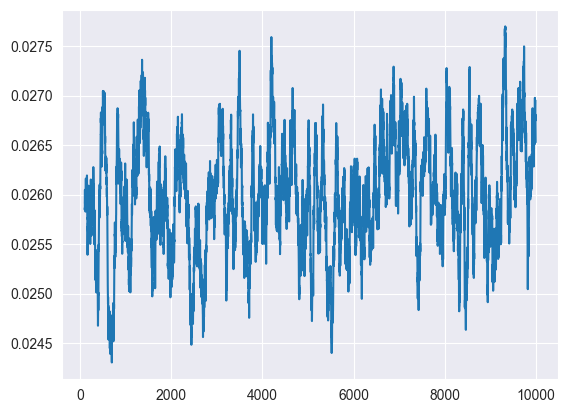

In [55]:
plt.plot(df_vol.iloc[:, 1].rolling(100).mean())